## Objective for this Notebook
1. Learn how to Define the Neural Network with Same Weights Initialization define Criterion Function, Optimizer, and Train the Model
2. Define the Neural Network with default Weights Initialization, define Criterion Function, Optimizer
3. Train the Model

## Preparation

In [2]:
# Import the libraries we need for this lab

import torch
import torch.nn as nn
from torch import sigmoid
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(0)

In [1]:
# The function for plotting the model
def plot_stuff(X, y, model, epoch, leg=True):
  plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
  plt.plot(X.numpy(), Y.numpy(), 'r')
  plt.xlabel('x')
  if leg == True:
    plt.legend()
  else:
    pass

## Neural Network Module and Training Function

In [10]:
# Define the class Net
class Net(nn.Module):
  # Constructor
  def __init__(self, D_in, H, D_out):
    super(Net, self).__init__()
    # hidden layers
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)
    # Define the firs linear layer as an attribute, this is not a good practice
    self.a1 = None
    self.l1 = None
    self.l2 = None

  # Prediction
  def forward(self, x):
    self.l1 = self.linear1(x)
    self.a1 = sigmoid(self.l1)
    self.l2 = self.linear2(self.a1)
    yhat = sigmoid(self.linear2(self.a1))
    return yhat

In [17]:
# Define the training function
def train(Y, X, model, optimizer, criterion, epochs=1000):
  COST = []
  total = 0
  for epoch in range(epochs):
    total = 0
    for y, x in zip(Y, X):
      yhat = model(x)
      loss = criterion(yhat, y)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      # Cumulative loss
      total += loss.item()
    COST.append(total)

    if epoch % 300 == 0:
      plot_stuff(X, Y, model, epoch, leg=True)
      plt.show()
      model(X)
      plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
      plt.title('activations')
      plt.show()
  return COST

## Make Some Data

In [5]:
# Make some data
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0]>-4) & (X[:, 0] < 4)] = 1.0

## Define the Neural Network with Same Weights Initialization, define Criterion Function, Optimizer and Train the Model

In [19]:
# The loss function
def criterion_cross(outputs, labels):
  out = -1 * torch.mean(labels * torch.log(outputs) + (1-labels) * torch.log(1-outputs))
  return out

In [11]:
# Train the model
# size of input
D_in = 1
# size of hidden layer
H = 2
# number of outputs
D_out = 1
# learning rate
learning_rate = 0.1
# create the model
model = Net(D_in, H, D_out)

In [13]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.0887],
                      [ 0.2646]])),
             ('linear1.bias', tensor([-0.3022, -0.1966])),
             ('linear2.weight', tensor([[-0.6755, -0.4683]])),
             ('linear2.bias', tensor([-0.2915]))])

In [15]:
model.state_dict()['linear1.weight'][0] = 1.0
model.state_dict()['linear1.weight'][1] = 1.0
model.state_dict()['linear2.weight'][0] = 1.0
model.state_dict()['linear1.bias'][0] = 0.0
model.state_dict()['linear1.bias'][1] = 0.0
model.state_dict()['linear2.bias'][0] = 0.0
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.],
                      [1.]])),
             ('linear1.bias', tensor([0., 0.])),
             ('linear2.weight', tensor([[1., 1.]])),
             ('linear2.bias', tensor([0.]))])

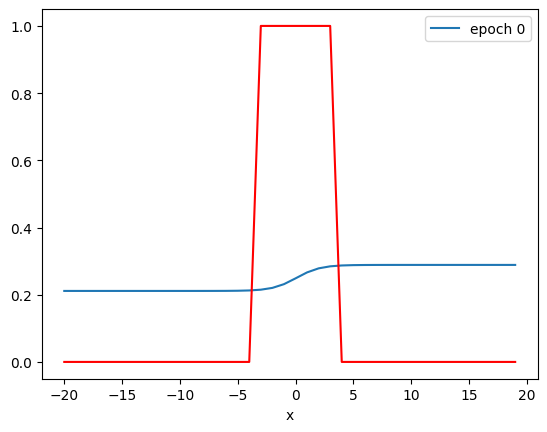

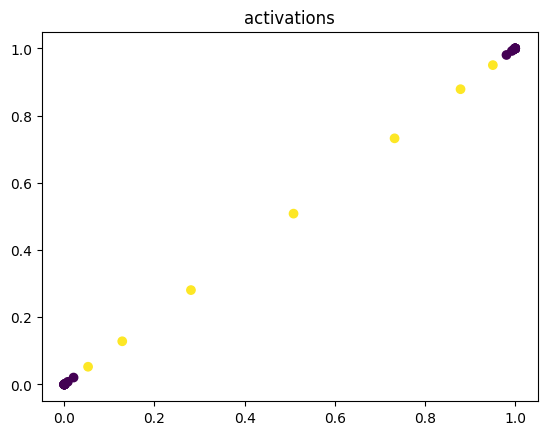

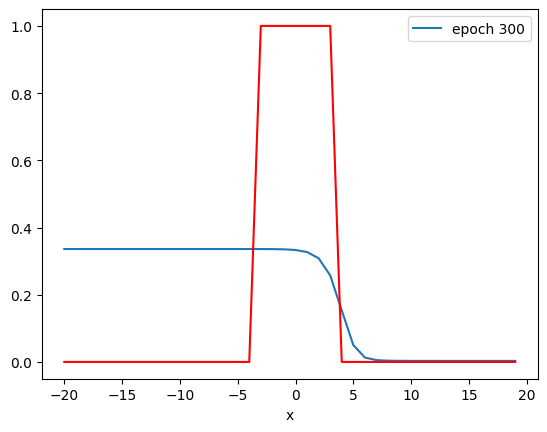

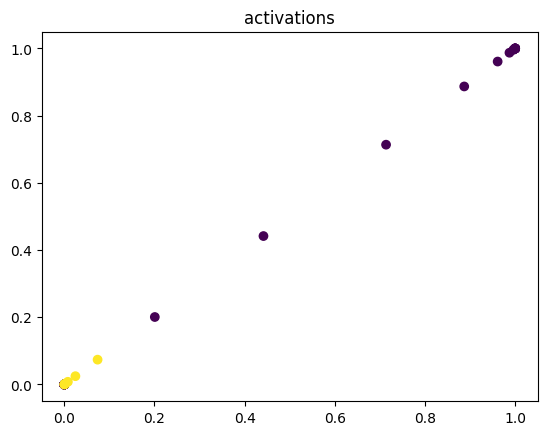

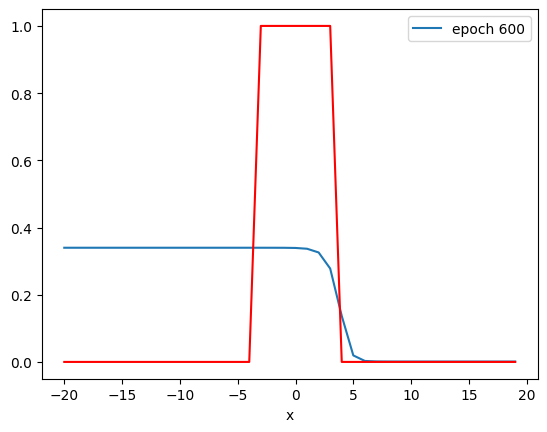

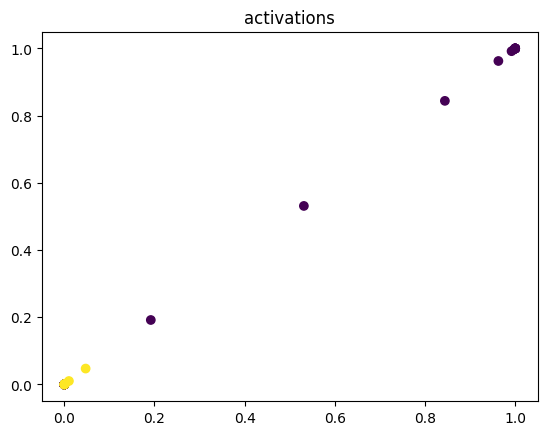

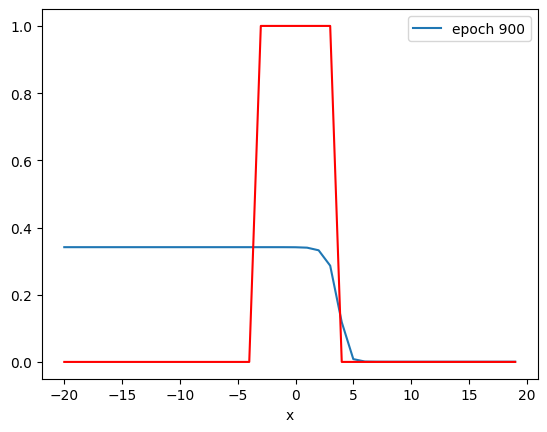

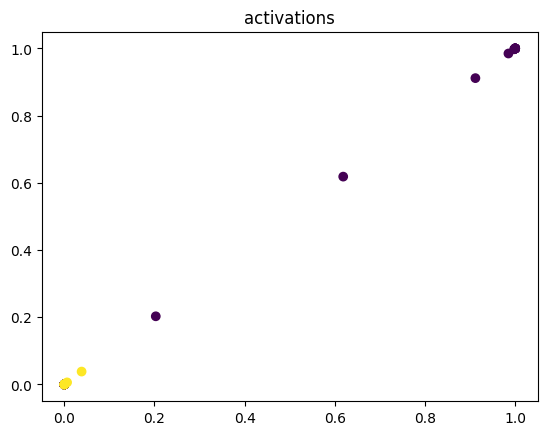

Text(0.5, 1.0, 'cross entropy loss')

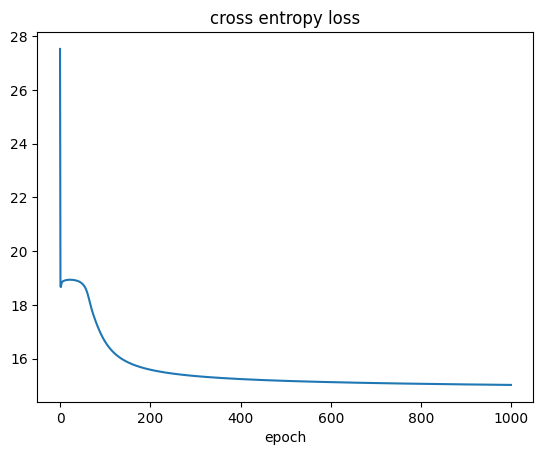

In [20]:
#optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
# plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

By examining the output of the  paramters all thought they have changed they are identical.


In [21]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.9340],
                      [1.9340]])),
             ('linear1.bias', tensor([-9.0725, -9.0725])),
             ('linear2.weight', tensor([[-3.3976, -3.3976]])),
             ('linear2.bias', tensor([-0.6546]))])

In [22]:
yhat = model(torch.tensor([[-2.0], [0.0], [2.0]]))
yhat

tensor([[0.3420],
        [0.3418],
        [0.3337]], grad_fn=<SigmoidBackward0>)

## Define the Neural Network, Criterion Function, Optimizer and Train the Model

In [23]:
# Train the model
# size of input
D_in = 1
# size of hidden layer
H = 2
# number of outputs
D_out = 1
# learning rate
learning_rate = 0.1
# create the model
model = Net(D_in, H, D_out)

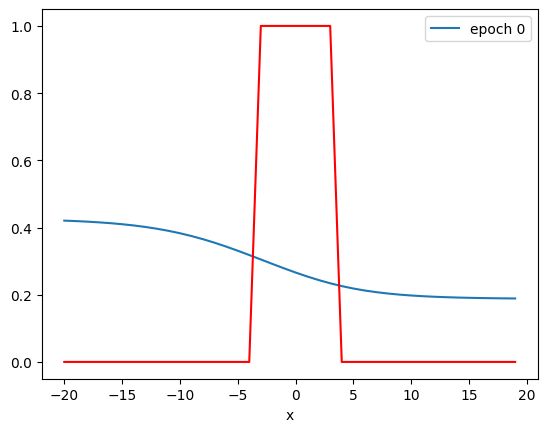

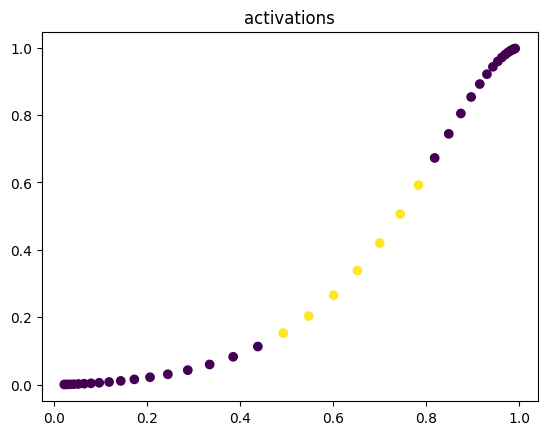

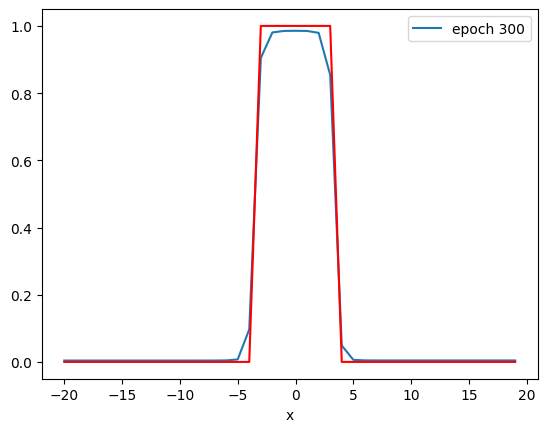

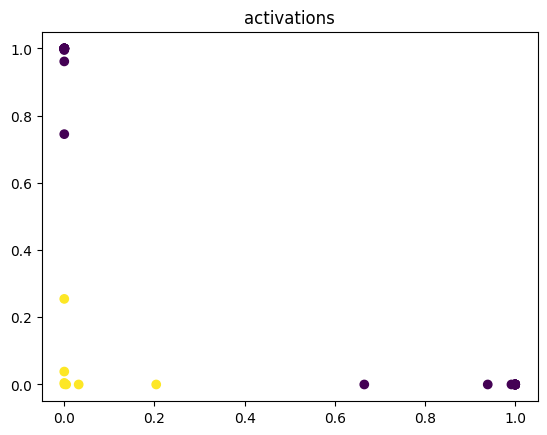

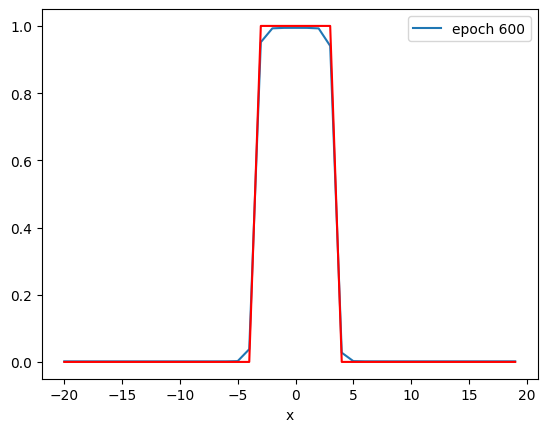

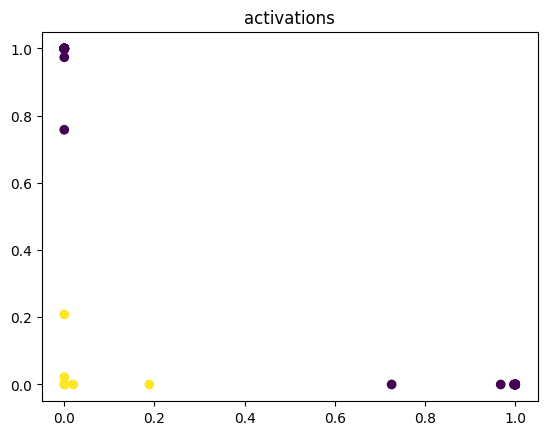

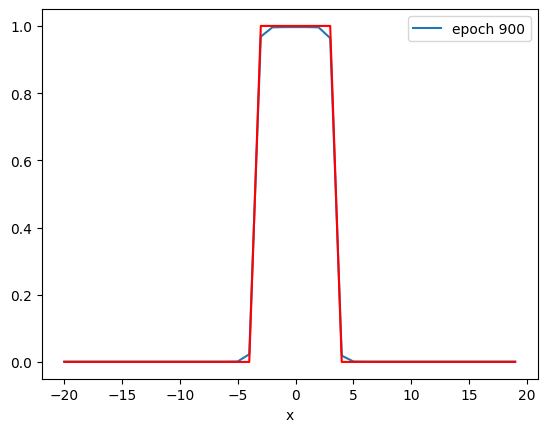

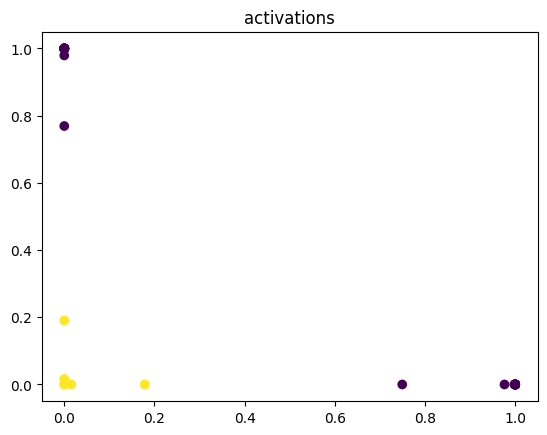

Text(0.5, 1.0, 'cross entropy loss')

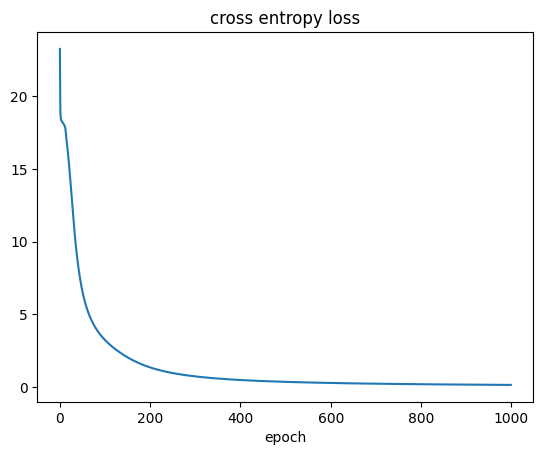

In [24]:
#optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
# plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

In [28]:
# Train the model
# size of input
D_in = 1
# size of hidden layer
H = 2
# number of outputs
D_out = 1
# learning rate
learning_rate = 0.1
# create the model
model = Net(D_in, H, D_out)
criterion_cross = torch.nn.MSELoss()

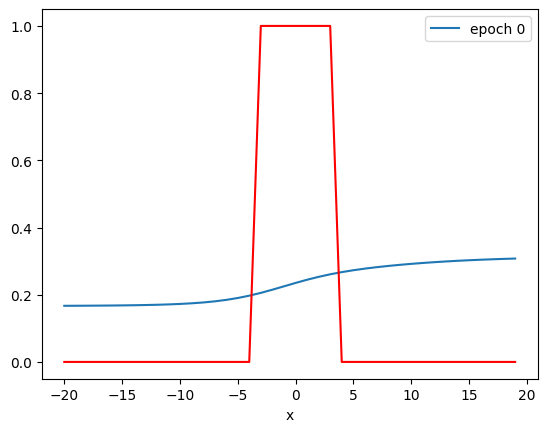

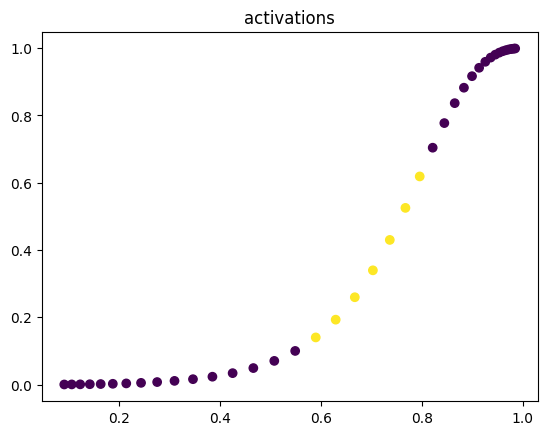

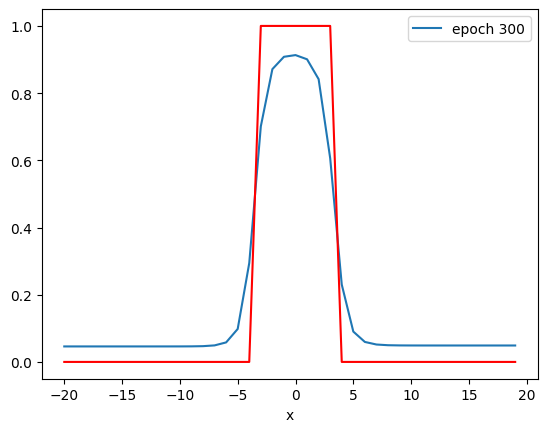

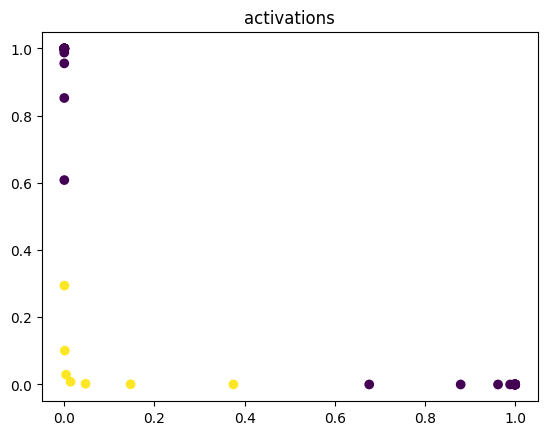

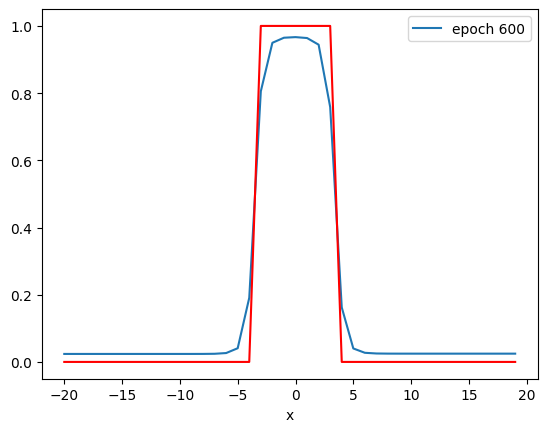

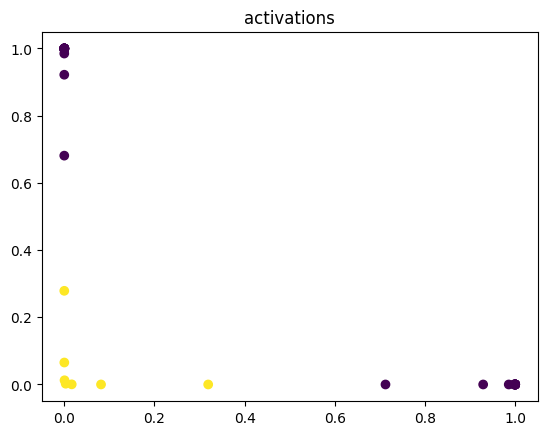

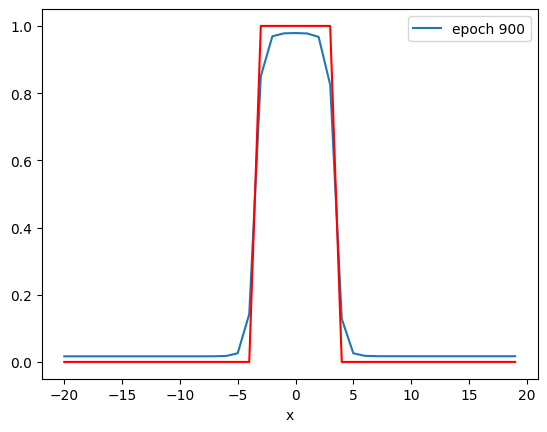

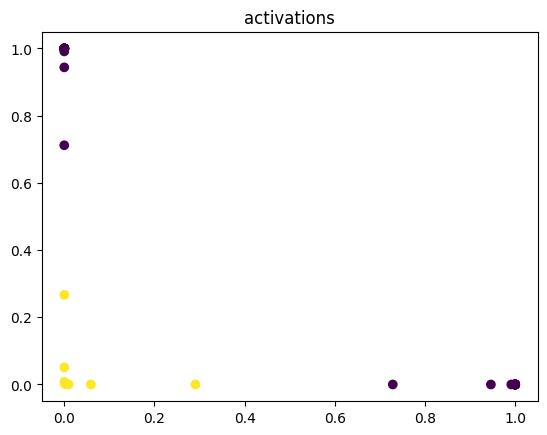

Text(0.5, 1.0, 'MSE loss')

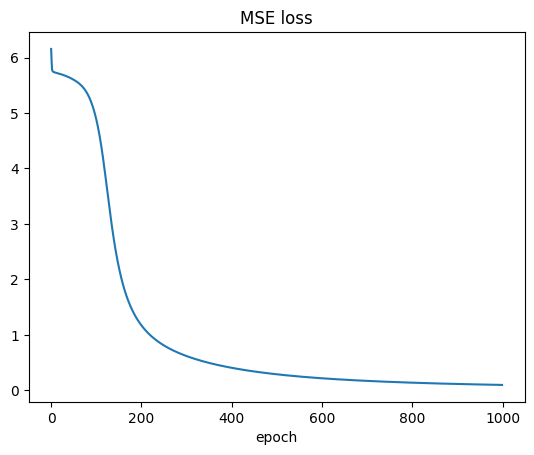

In [29]:
#optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
# plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('MSE loss')

In [27]:
yhat=model(torch.tensor([[-2.0],[0.0],[2.0]]))
yhat

tensor([[0.9805],
        [0.9877],
        [0.9802]], grad_fn=<SigmoidBackward0>)